# MY PHONEDATA DATASET
Use the association rules on my_phonedata dataset to understand the business problem and provide solutions.

## BUSINESS OBJECTIVE
* Maximize profit
* Maximize performance 
* Minimize loss

## CONSTRAINTS
* Constantly changing business
* Very High Competition

Importing the required libraries

In [1]:
import pandas as pd
from mlxtend.frequent_patterns import apriori , association_rules
from termcolor import colored

Loading the dataset

In [2]:
df0=pd.read_csv(r"D:\360Digitmg\ASSIGNMENTS\Ass9\myphonedata.csv")
df=df0.copy()
df.head()

,V1,V2,V3,red,white,green,yellow,orange,blue
0,red,white,green,1,1,1,0,0,0
1,white,orange,NaN,0,1,0,0,1,0
2,white,blue,NaN,0,1,0,0,0,1
3,red,white,orange,1,1,0,0,1,0
4,red,blue,NaN,1,0,0,0,0,1


In [3]:
df.drop(['V1','V2','V3'],axis=1,inplace=True)
df.head()

,red,white,green,yellow,orange,blue
0,1,1,1,0,0,0
1,0,1,0,0,1,0
2,0,1,0,0,0,1
3,1,1,0,0,1,0
4,1,0,0,0,0,1


## EXPLORATORY DATA ANALYSIS
The below lines gives a very basic understanding of the dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   red     11 non-null     int64
 1   white   11 non-null     int64
 2   green   11 non-null     int64
 3   yellow  11 non-null     int64
 4   orange  11 non-null     int64
 5   blue    11 non-null     int64
dtypes: int64(6)
memory usage: 656.0 bytes


In [5]:
df.describe()

,red,white,green,yellow,orange,blue
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
mean,0.545455,0.636364,0.181818,0.090909,0.181818,0.545455
std,0.522233,0.504525,0.404520,0.301511,0.404520,0.522233
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


__To find the number of books available in each book category__

In [6]:
cb=pd.DataFrame(df['red'].value_counts())
yb=pd.DataFrame(df['white'].value_counts())
Cb=pd.DataFrame(df['green'].value_counts())
db=pd.DataFrame(df['yellow'].value_counts())
rb=pd.DataFrame(df['orange'].value_counts())
ab=pd.DataFrame(df['blue'].value_counts())


print(colored('The number of phones of each colors are as follows : \n','blue',attrs=['bold']))
print(colored('Red  : ','blue',attrs=['bold']),cb.iat[1,0],'\n')
print(colored('White : ','blue',attrs=['bold']),yb.iat[1,0],'\n')
print(colored('Green : ','blue',attrs=['bold']),Cb.iat[1,0],'\n')
print(colored('Yellow : ','blue',attrs=['bold']),db.iat[1,0],'\n')
print(colored("Orange : ",'blue',attrs=['bold']),rb.iat[1,0],'\n')
print(colored('Blue  : ','blue',attrs=['bold']),ab.iat[1,0],'\n')



The number of phones of each colors are as follows : 

Red  :  5 

White :  4 

Green :  2 

Yellow :  1 

Orange :  2 

Blue  :  5 



__Most Frequent Itemsets based on Support__

Using the mlxtend library to use the apriori algorithm, the minimum support is set to 0.2

In [7]:
frequent_itemsets= apriori(df,min_support=0.2,max_len=3,use_colnames=True)
frequent_itemsets.sort_values('support',ascending=False,inplace=True)
frequent_itemsets

C:\Users\lenny\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
1,0.636364,(white)
0,0.545455,(red)
2,0.545455,(blue)
3,0.363636,"(red, white)"
4,0.363636,"(blue, red)"
5,0.363636,"(blue, white)"


__Plotting the itemsets with higher support values__

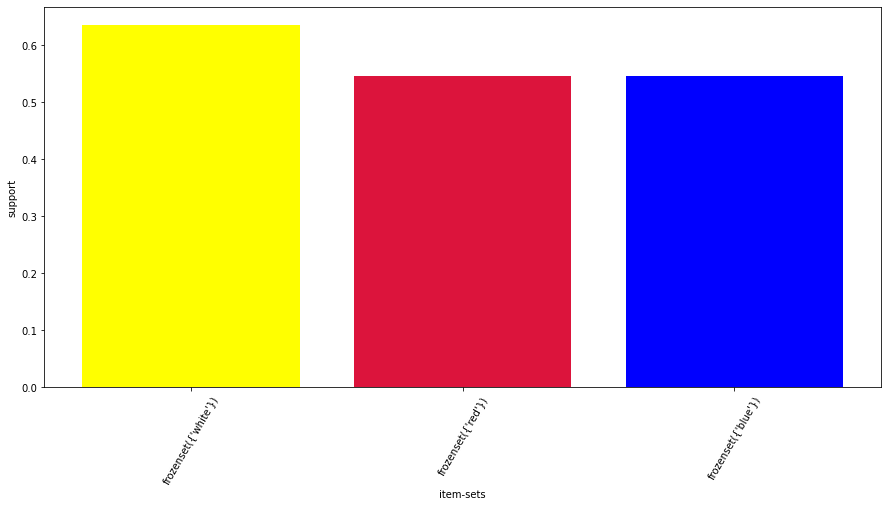

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))
plt.bar(x=list(range(0,3)),height=frequent_itemsets.support[0:3],color=['yellow','crimson','blue'])
plt.xticks(list(range(0, 3)), frequent_itemsets.itemsets[0:3], rotation=60)
plt.xlabel('item-sets')
plt.ylabel('support')
plt.show()

Using the association rules from mlxtend to get the support, confidence and lift values. Setting the min value for lift to 1 as anything below that indicates lower chance of it being bought. 

In [9]:
rules = association_rules(frequent_itemsets, metric = "lift", min_threshold = 1)
rules.shape

(6, 9)

In [10]:
rules=rules.sort_values('lift',ascending=False)
rules=rules.reset_index()
rules.head(10)

,index,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,2,(blue),(red),0.545455,0.545455,0.363636,0.666667,1.222222,0.066116,1.363636
1,3,(red),(blue),0.545455,0.545455,0.363636,0.666667,1.222222,0.066116,1.363636
2,1,(white),(red),0.636364,0.545455,0.363636,0.571429,1.047619,0.016529,1.060606
3,5,(white),(blue),0.636364,0.545455,0.363636,0.571429,1.047619,0.016529,1.060606
4,0,(red),(white),0.545455,0.636364,0.363636,0.666667,1.047619,0.016529,1.090909
5,4,(blue),(white),0.545455,0.636364,0.363636,0.666667,1.047619,0.016529,1.090909


#### Profusion Removal
from the above table its clear that there are many duplicates so following the below steps to remove the duplicates. 

In [11]:
#Using a custom function which returns a list.
def to_list(i):
    return (list(i))
#The antecedents and consequents are separately added to a list and concatenated creating a series. 
ma_X = rules.antecedents.apply(to_list) + rules.consequents.apply(to_list)
#The series is then sorted in alphabetical order.
ma_X = ma_X.apply(sorted)
#The series is then saved to rules_sets as a list. 
rules_sets = list(ma_X)
#To eliminate the duplicates the list is then converted into a tuple and then again converted to a list.
unique_rules_sets = [list(m) for m in set(tuple(i) for i in rules_sets)]
#Creating a empty list
index_rules = []
#storing the index number of the remaining itemsets in index_rules.
for i in unique_rules_sets:
    index_rules.append(rules_sets.index(i))

# getting rules without any redudancy/profusion
rules_no_redudancy = rules.iloc[index_rules, :]

# Sorting them with respect to list and getting top 10 rules 
rules_no_redudancy.sort_values('lift', ascending = False).head(10)

,index,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,2,(blue),(red),0.545455,0.545455,0.363636,0.666667,1.222222,0.066116,1.363636
3,5,(white),(blue),0.636364,0.545455,0.363636,0.571429,1.047619,0.016529,1.060606
2,1,(white),(red),0.636364,0.545455,0.363636,0.571429,1.047619,0.016529,1.060606


Networkx is used to build a network graph to check the association of antecendents and consequents obtained after association rules.

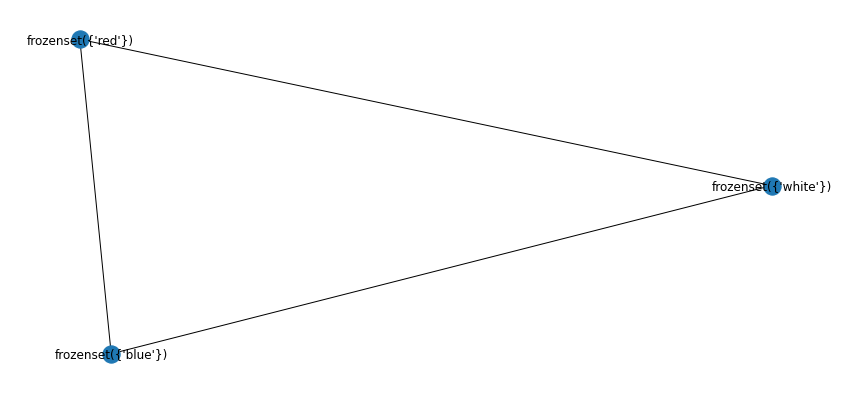

In [12]:
import networkx as nx
fig, ax=plt.subplots(figsize=(15,7))
GA=nx.from_pandas_edgelist(rules_no_redudancy[0:10],source='antecedents',target='consequents')
nx.draw(GA,with_labels=True)
plt.show()

## CONCLUSION
* The chances of buying red, blue, white colored phones is higher than the other colors.
* If any one of red, blue, white colored phones is bought then the chance othe any other of the same group of colored phones is high. 
* So if phones of red , blue and white are place alongside then the chance of them being bought is higher.